# Algorithm 

# Description 

The Cluster Components class takes in a binary volume containing clusters and will report information and perform action on those clusters. Specifically, it will use connected components to label them, threshold them by volume, and find the centroids and volumes of each cluster.

**Inputs:** The input Volume 

**Outputs:** An object of type clusterComponent


# The Code
**Imports**

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'../code/functions/')
import tiffIO as tIO
import connectLib as cLib
import plosLib as pLib
import time
import scipy.ndimage as ndimage
import numpy as np

**The Actual Code:**

In [10]:
import scipy.ndimage as ndimage

class ClusterComponent:
    
    def __init__(self, bianIm):
        self.s = [[[1 for k in xrange(3)] for j in xrange(3)] for i in xrange(3)]
        label_im, nr_objects = ndimage.label(bianIm, self.s)
        self.numClusters = nr_objects
        self.labeledIm = label_im
        self.volumes = self.getVolumes()
        self.centroids = self.getCentroids()

    def volumeThreshold(self, threshold=250):
        mask = self.labeledIm > self.labeledIm.mean()
        sizes = ndimage.sum(mask, self.labeledIm, range(self.numClusters + 1))
        mask_size = sizes > threshold
        remove_pixel = mask_size[self.labeledIm]
        self.labeledIm[remove_pixel] = 0
        new_label_im, new_nr_objects = ndimage.label(self.labeledIm, self.s)
        self.labeledIm = new_label_im
        self.numClusters = new_nr_objects
        self.volumes = self.getVolumes()
        self.centroids = self.getCentroids()
        
    def getVolumes(self):
        mask = self.labeledIm > self.labeledIm.mean()
        temp, temp_nr_objects = ndimage.label(self.labeledIm, self.s) 
        sizesTemp = ndimage.sum(mask, temp, range(self.numClusters + 1))
        sizesTempRemoved0 = [sizesTemp[i] for i in range(1, len(sizesTemp))]
        return sizesTempRemoved0
    
    def getCentroids(self):
        centers = ndimage.measurements.center_of_mass(self.labeledIm, self.labeledIm, [i for i in range(self.numClusters)])
        return centers

**I will be using the below cell for analyzing Cluster Component's Performance:**

In [62]:
def ccAnalysis(input): 
    labeledNumClusters = []
    labeledNumCentroids = []
    labeledNumVolumes = []
    times = []

    for i in range(10):
        start_time = time.time()
        clusterList = ClusterComponent(input)
        times.append((time.time() - start_time))
        labeledNumClusters.append(clusterList.numClusters)
        labeledNumCentroids.append(len(clusterList.centroids))
        labeledNumVolumes.append(len(clusterList.volumes))

    print 'Average Number of Clusters:\n\tExpected: Around 450\tActual: ' + str(np.mean(labeledNumClusters))
    print 'Average Number of Centroids:\n\tExpected: Around 450\tActual: ' + str(np.mean(labeledNumCentroids))
    print 'Average Number of Volumes:\n\tExpected: Around 450\tActual: ' + str(np.mean(labeledNumVolumes))
    print 'Average Time Taken to Execute: ' + str(np.mean(times))
    return clusterList 

## Cluster Components Conditions
Connected Components would work well under the conditions that the input volume contains seperable, non-overlapping, sparse clusters and that the input volume is in binary-form (i.e. the values of the background voxels are 0's and the value of the foreground voxels are all positive integers).
Connected Components would work poorly if the volume is not binary (i.e. the values of the background voxels are anything besides 0) or if the clusters are dense or in any way neighboring eachother.

## Predictable Data Sets

**The Good Data Set:**

**Description:** The good data set is a 1000 x 1000 x 100 volume containing 1875 clusters of size 125 with value of 1. Every other value in the volume is 0. 

**Plot:** I will plot the data at z=5 because it provides better visualization.

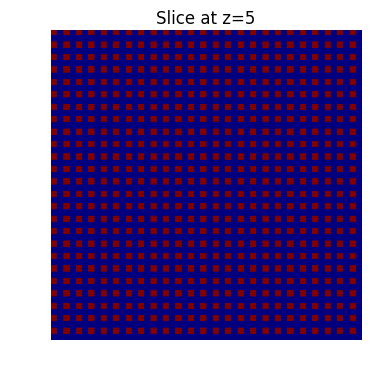

In [1]:
import numpy as np
import matplotlib.pyplot as plt

clusterGrid = np.zeros((100, 1000, 1000))
for i in range(40):
    for j in range(40):
        for k in range(40):
            clusterGrid[20*(2*j): 20*(2*j + 1), 20*(2*i): 20*(2*i + 1), 20*(2*k): 20*(2*k + 1)] = 1
            
plt.imshow(clusterGrid[5])
plt.axis('off')
plt.title('Slice at z=5')
plt.show()

**Prediction:** I predict that this volume will be perfectly segmented into 1875 clusters.

**The Difficult Data Set:**

**Description:** The good data set is a 1000 x 1000 x 100 volume containing 1875 clusters of size 125 with value of 2. Every other value in the volume is 1. In other words, the image is not binarized.

**Plot:** I will plot the data at z=5 because it provides better visualization.

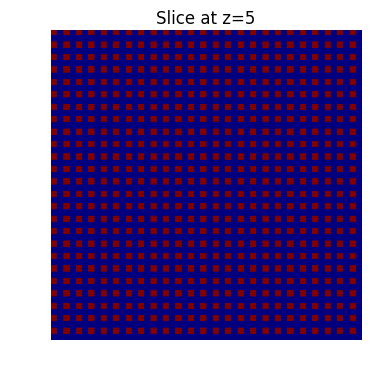

In [2]:
clusterGrid = clusterGrid + 1
plt.imshow(clusterGrid[5])
plt.axis('off')
plt.title('Slice at z=5')
plt.show()

**Prediction:** I predict that the entire volume will be segmented into one big component.

# Simulation
## Toy Data Generation

**The Good Data Set:**

In [3]:
simEasyGrid = np.zeros((100, 100, 100))
for i in range(4):
    for j in range(4):
        for k in range(4):
            simEasyGrid[20*(2*j): 20*(2*j + 1), 20*(2*i): 20*(2*i + 1), 20*(2*k): 20*(2*k + 1)] = 1

**Predicting what good data will look like:** I believe the good data will look like a grid of 27 cubes, 9 in each slice that contains clusters.

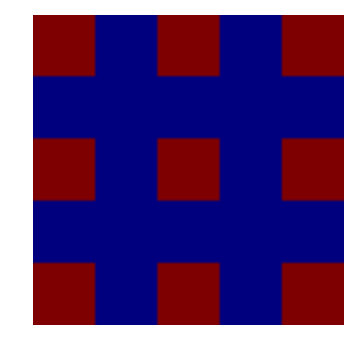

In [4]:
plt.imshow(simEasyGrid[5])
plt.axis('off')
plt.show()

**Visualization relative to prediction:** As predicted, the good data looks like a grid of cubes, 9 in each slice that contains clusters.

**The Difficult Data Set:**

In [24]:
simDiffGrid = simEasyGrid + 1

**Predicting what difficult data will look like:** I believe the good data will look like a grid of 27 cubes, 9 in each slice that contains clusters.

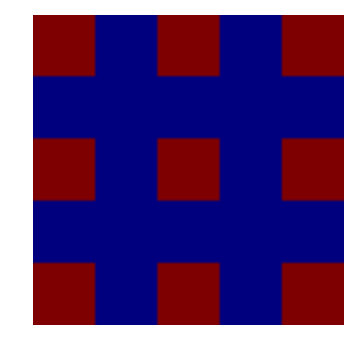

In [25]:
plt.imshow(simDiffGrid[5])
plt.axis('off')
plt.show()

**Visualization relative to prediction:** As predicted, the difficult data looks like a grid of cubes, 9 in each slice that contains clusters.
### Toy Data Analysis
**Good Data Prediction: ** 
I predict that the good data will segment the easy simulation into 27 clusters very quickly.

In [12]:
goodDatCC = ClusterComponent(simEasyGrid)

In [13]:
print "num volumes: " + str(len(goodDatCC.volumes))
print "num clusters: " + str(goodDatCC.numClusters)
print "num centroids: " + str(len(goodDatCC.centroids))

num volumes: 27
num clusters: 27
num centroids: 27


**Results of Good Data Relative to Predictions:** As expected, the volume was segmented into 27 seperate clusters very quickly.

**Repeating the Good Data Simulation:**

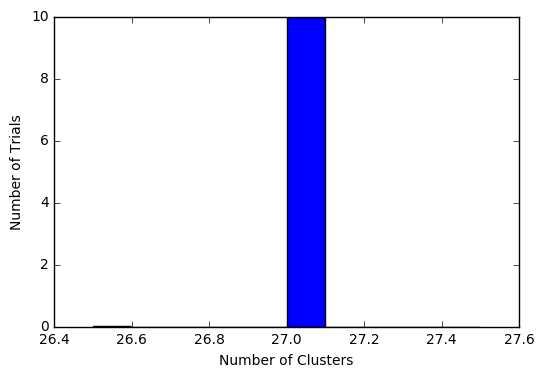

Average Number of Components on Easy Simulation Data:
	Expected: 27	Actual: 27.0


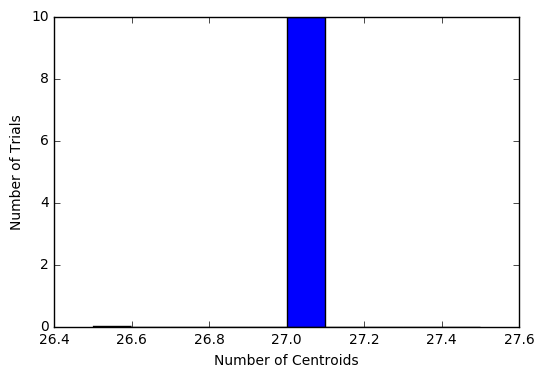

Average Number of Components on Easy Simulation Data:
	Expected: 27	Actual: 27.0


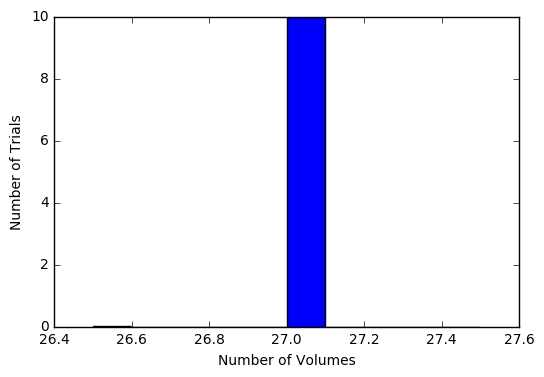

Average Number of Components on Easy Simulation Data:
	Expected: 27	Actual: 27.0


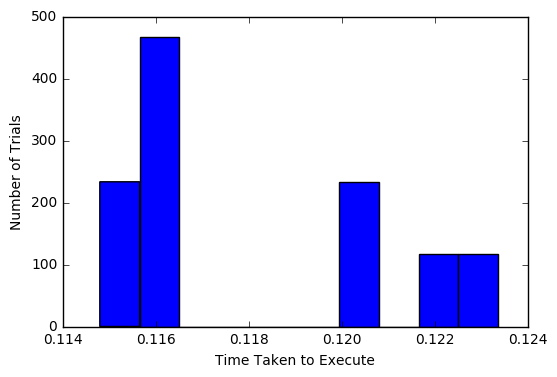

Average Time Taken to Execute: 0.118158221245


In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
labeledNumClusters = []
labeledNumCentroids = []
labeledNumVolumes = []
times = []

for i in range(10):
    start_time = time.time()
    clusterList = ClusterComponent(simEasyGrid)
    labeledNumClusters.append(clusterList.numClusters)
    labeledNumCentroids.append(len(clusterList.centroids))
    labeledNumVolumes.append(len(clusterList.volumes))
    times.append((time.time() - start_time))
    

pylab.hist(labeledNumClusters, normed=1)
pylab.xlabel('Number of Clusters')
pylab.ylabel('Number of Trials')
pylab.show()
print 'Average Number of Components on Easy Simulation Data:\n\tExpected: 27\tActual: ' + str(np.mean(labeledNumClusters))

pylab.hist(labeledNumCentroids, normed=1)
pylab.xlabel('Number of Centroids')
pylab.ylabel('Number of Trials')
pylab.show()
print 'Average Number of Components on Easy Simulation Data:\n\tExpected: 27\tActual: ' + str(np.mean(labeledNumCentroids))

pylab.hist(labeledNumVolumes, normed=1)
pylab.xlabel('Number of Volumes')
pylab.ylabel('Number of Trials')
pylab.show()
print 'Average Number of Components on Easy Simulation Data:\n\tExpected: 27\tActual: ' + str(np.mean(labeledNumVolumes))

pylab.hist(times, normed=1)
pylab.xlabel('Time Taken to Execute')
pylab.ylabel('Number of Trials')
plt.show()
print 'Average Time Taken to Execute: ' + str(np.mean(times))

**Difficult Data Prediction:** I predict the difficult data will be segmented into 1 big cluster.

In [26]:
badDatCC = ClusterComponent(simDiffGrid)

In [28]:
print "num volumes: " + str(len(badDatCC.volumes))
print "num clusters: " + str(badDatCC.numClusters)
print "num centroids: " + str(len(badDatCC.centroids))

num volumes: 1
num clusters: 1
num centroids: 1


**Results of Difficult Data Result Relative to Prediction:** As expected, the volume was segmented into one big component.

**Repeating the Difficult Data Simulation:**

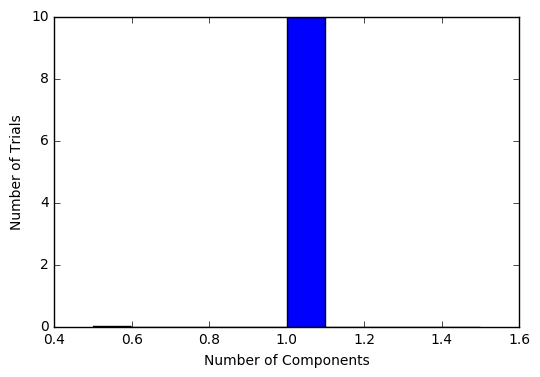

Average Number of Components on Easy Simulation Data:
	Expected: 27	Actual: 1.0


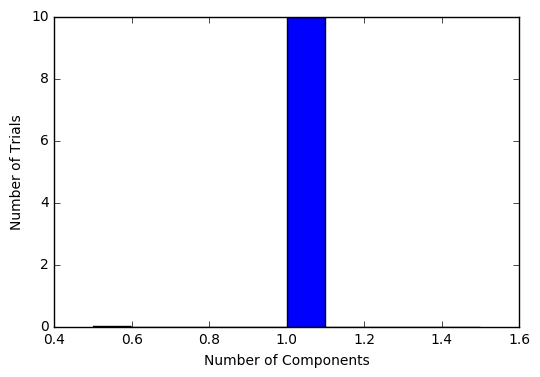

Average Number of Components on Easy Simulation Data:
	Expected: 27	Actual: 1.0


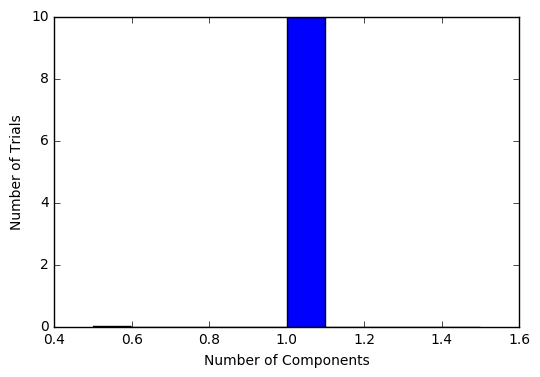

Average Number of Components on Easy Simulation Data:
	Expected: 27	Actual: 1.0


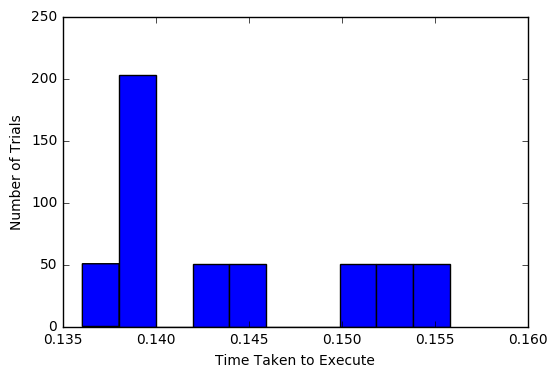

Average Time Taken to Execute: 0.14370174408


In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
labeledNumClusters = []
labeledNumCentroids = []
labeledNumVolumes = []
times = []

for i in range(10):
    start_time = time.time()
    clusterList = ClusterComponent(simDiffGrid)
    labeledNumClusters.append(clusterList.numClusters)
    labeledNumCentroids.append(len(clusterList.centroids))
    labeledNumVolumes.append(len(clusterList.volumes))
    times.append((time.time() - start_time))
    

pylab.hist(labeledNumClusters, normed=1)
pylab.xlabel('Number of Components')
pylab.ylabel('Number of Trials')
pylab.show()
print 'Average Number of Components on Easy Simulation Data:\n\tExpected: 27\tActual: ' + str(np.mean(labeledNumClusters))

pylab.hist(labeledNumCentroids, normed=1)
pylab.xlabel('Number of Components')
pylab.ylabel('Number of Trials')
pylab.show()
print 'Average Number of Components on Easy Simulation Data:\n\tExpected: 27\tActual: ' + str(np.mean(labeledNumCentroids))

pylab.hist(labeledNumVolumes, normed=1)
pylab.xlabel('Number of Components')
pylab.ylabel('Number of Trials')
pylab.show()
print 'Average Number of Components on Easy Simulation Data:\n\tExpected: 27\tActual: ' + str(np.mean(labeledNumVolumes))

pylab.hist(times, normed=1)
pylab.xlabel('Time Taken to Execute')
pylab.ylabel('Number of Trials')
plt.show()
print 'Average Time Taken to Execute: ' + str(np.mean(times))

**Summary of Performances:** Connected Components performed extremely well on the easy simulation, correctly detecting 27 components very quickly for every trial. It also performed poorly as expected on the difficult simulation, connecting 1 component for every trial

# Real Data
## Synthetic Data Analysis
**Description:** Validation testing will be performed on a a 100x100x100 volume with a pixel intensity distribution approximately the same as that of the true image volumes (i.e., 98% background, 2% synapse). The synapse pixels will be grouped together in clusters as they would in the true data. Based on research into the true size of synapses, these synthetic synapse clusters will be given area of ~1 micron ^3, or about 139 voxels (assuming the synthetic data here and the real world data have identical resolutions). After the data goes through the algorithm, I will gauge performance based on the following:
number of clusters (should be about 500)
volumetric density of data (should be about 2% of the data)

**Plotting Raw Synthetic Data:**

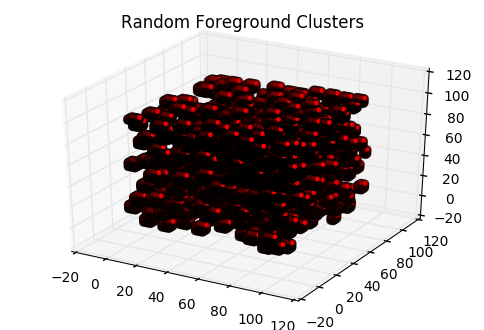

In [65]:
from random import randrange as rand
from mpl_toolkits.mplot3d import axes3d, Axes3D

def generatePointSet():
    center = (rand(0, 99), rand(0, 99), rand(0, 99))
    toPopulate = []
    for z in range(-1, 5):
        for y in range(-1, 5):
            for x in range(-1, 5):
                curPoint = (center[0]+z, center[1]+y, center[2]+x)
                #only populate valid points
                valid = True
                for dim in range(3):
                    if curPoint[dim] < 0 or curPoint[dim] >= 100:
                        valid = False
                if valid:
                    toPopulate.append(curPoint)
    return set(toPopulate)
    
def generateTestVolume():
    #create a test volume
    volume = np.zeros((100, 100, 100))
    myPointSet = set()
    for _ in range(rand(500, 800)):
        potentialPointSet = generatePointSet()
        #be sure there is no overlap
        while len(myPointSet.intersection(potentialPointSet)) > 0:
                potentialPointSet = generatePointSet()
        for elem in potentialPointSet:
            myPointSet.add(elem)
    #populate the true volume
    for elem in myPointSet:
        volume[elem[0], elem[1], elem[2]] = 60000
    #introduce noise
    noiseVolume = np.copy(volume)
    for z in range(noiseVolume.shape[0]):
        for y in range(noiseVolume.shape[1]):
            for x in range(noiseVolume.shape[2]):
                if not (z, y, x) in myPointSet:
                    noiseVolume[z][y][x] = rand(0, 10000)
    return volume

foreground = generateTestVolume()


#displaying the random clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z, y, x = foreground.nonzero()
ax.scatter(x, y, z, zdir='z', c='r')
plt.title('Random Foreground Clusters')
plt.show()

**Expectation for Synthetic Data:** I expect that the Connected Components will detect around 500 clusters.

**Running Algorithm on Synethetic Data:**

In [66]:
clusterList = ccAnalysis(foreground)

Average Number of Clusters:
	Expected: Around 450	Actual: 471.0
Average Number of Centroids:
	Expected: Around 450	Actual: 471.0
Average Number of Volumes:
	Expected: Around 450	Actual: 471.0
Average Time Taken to Execute: 0.121209549904


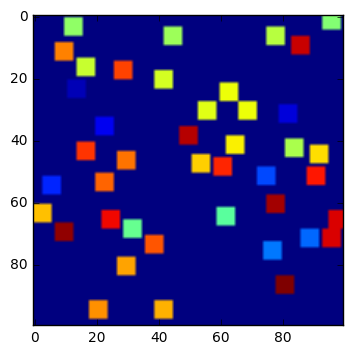

In [73]:
plt.imshow(clusterList.labeledIm[8])
plt.show()

# Real Data Analysis
I will first be testing to ensure that the Cluster Components functions on a slice of 5, and measuring the time it takes to ensure it is fast. I will also test the VolumeThreshold function, reporting the average volumes before and after the thresholding takes place, and plotting a slice to ensure that the volume threshold function is working properly. I will then repeat such tests on the entire volume.
# Slice of 5

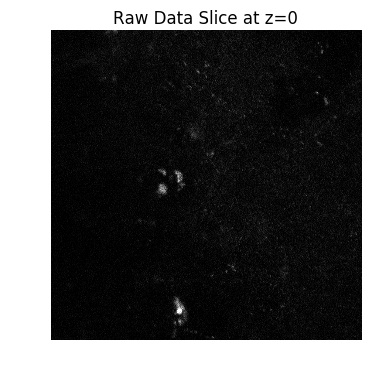

In [257]:
dataSubset = tIO.unzipChannels(tIO.loadTiff('../data/SEP-GluA1-KI_tp1.tif'))[0][0:5]
plt.imshow(dataSubset[0], cmap="gray")
plt.axis('off')
plt.title('Raw Data Slice at z=0')
plt.show()

In [258]:
#finding the clusters after plosPipeline
plosOutSub = pLib.pipeline(dataSubset)

In [259]:
#binarize output of plos lib
bianOutSub = cLib.otsuVox(plosOutSub)

In [260]:
#dilate the output based on neigborhood size
bianOutSub = ndimage.morphology.binary_dilation(bianOutSub).astype(int)

In [307]:
im = ClusterComponent(bianOutSub)

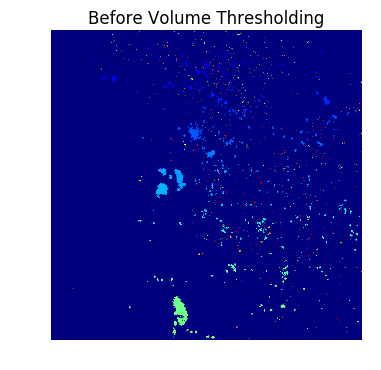

In [308]:
plt.imshow(im.labeledIm[3])
plt.title('Before Volume Thresholding')
plt.axis('off')
plt.show()

In [309]:
print "Average Volume Before Thresholding: " + str(np.mean(im.getVolumes()))

Average Volume Before Thresholding: 59.1380250955


In [310]:
print "num volumes: " + str(len(im.volumes))
print "num clusters: " + str(im.numClusters)
print "num centroids: " + str(len(im.centroids))

num volumes: 1833
num clusters: 1833
num centroids: 1833


In [311]:
im.volumeThreshold(200)

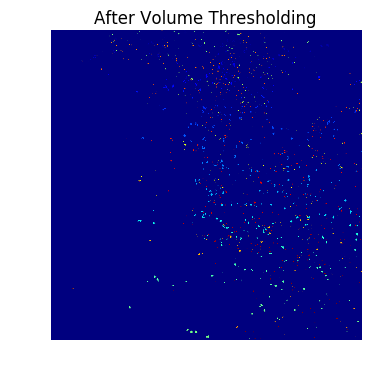

In [312]:
plt.imshow(im.labeledIm[3])
plt.title('After Volume Thresholding')
plt.axis('off')
plt.show()

In [313]:
print "Average Volume After Thresholding: " + str(np.mean(im.volumes))

Average Volume After Thresholding: 26.7953249715


In [314]:
print "num volumes: " + str(len(im.getVolumes()))
print "num clusters: " + str(im.numClusters)
print "num centroids: " + str(len(im.getCentroids()))

num volumes: 1754
num clusters: 1754
num centroids: 1754


In [316]:
start_time = time.time()
im = ClusterComponent(bianOutSub)
im.volumeThreshold(200)
print "Total Time Taken: " + str(time.time() - start_time) + " seconds"

Total Time Taken: 1.22045707703 seconds


# Entire Volume

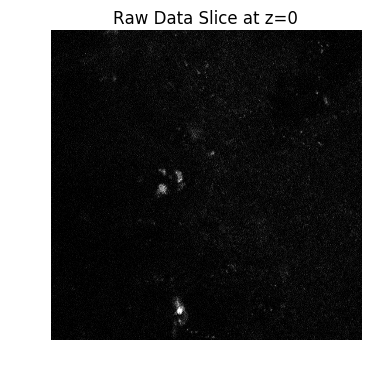

In [331]:
dataFull = tIO.unzipChannels(tIO.loadTiff('../data/SEP-GluA1-KI_tp1.tif'))[0]
plt.imshow(dataSubset[3], cmap="gray")
plt.axis('off')
plt.title('Raw Data Slice at z=0')
plt.show()

In [344]:
#finding the clusters after plosPipeline
plosOutFull = pLib.pipeline(dataFull)

In [369]:
#binarize output of plos lib
bianOutFull = cLib.otsuVox(plosOutFull)

In [370]:
#dilate the output based on neigborhood size
bianOutFullDil = ndimage.morphology.binary_dilation(bianOutFull).astype(int)

In [389]:
fullIm = ClusterComponent(bianOutFullDil)

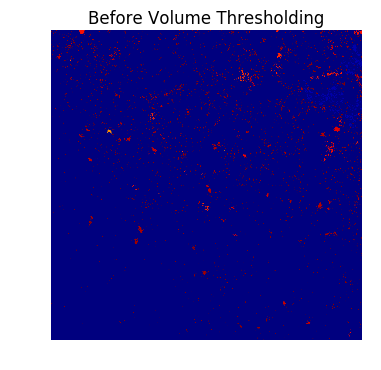

In [390]:
plt.imshow(fullIm.labeledIm[270])
plt.title('Before Volume Thresholding')
plt.axis('off')
plt.show()

In [391]:
print "Average Volume Before Thresholding: " + str(np.mean(fullIm.volumes))

Average Volume Before Thresholding: 30.8770912407


In [392]:
print "num volumes: " + str(len(fullIm.volumes))
print "num clusters: " + str(fullIm.numClusters)
print "num centroids: " + str(len(fullIm.centroids))

num volumes: 250031
num clusters: 250031
num centroids: 250031


In [394]:
fullIm.volumeThreshold(100)

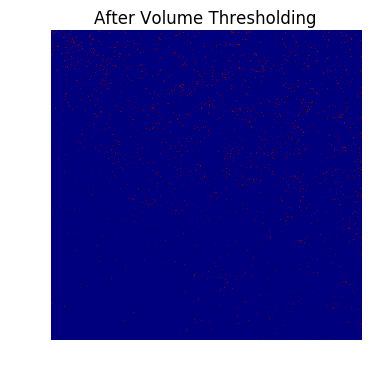

In [395]:
plt.imshow(fullIm.labeledIm[270])
plt.title('After Volume Thresholding')
plt.axis('off')
plt.show()

In [396]:
print "Average Volume After Thresholding: " + str(np.mean(fullIm.volumes))

Average Volume After Thresholding: 15.3082151593


In [397]:
print "num volumes: " + str(len(fullIm.volumes))
print "num clusters: " + str(fullIm.numClusters)
print "num centroids: " + str(len(fullIm.centroids))

num volumes: 242016
num clusters: 242016
num centroids: 242016


In [400]:
start_time = time.time()
fullIm = ClusterComponent(bianOutFullDil)
fullIm.volumeThreshold(100)
print "Total Time Taken: " + str(time.time() - start_time) + " seconds"

Total Time Taken: 62.4360370636 seconds
